In [1]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

importing dog vs cat data set

In [2]:
! kaggle competitions download -c dogs-vs-cats

 98% 797M/812M [00:10<00:00, 136MB/s]
100% 812M/812M [00:10<00:00, 77.8MB/s]


In [3]:
#  extrcating the compressed file
from zipfile import ZipFile

df = "/content/dogs-vs-cats.zip"

In [4]:
with ZipFile(df, 'r') as zip:
  zip.extractall()
  print('The Dataset is Extracted')

The Dataset is Extracted


In [5]:
from zipfile import ZipFile
df = "/content/train.zip"
with ZipFile(df, 'r') as zip:
  zip.extractall()
  print('The Dataset is Extracted')

The Dataset is Extracted


In [7]:
import os
path,dirs,files = next(os.walk("/content/train"))
file_count = len(files)
print('number_of_images:',file_count)

number_of_images: 25000


printing the name of images

In [8]:
file_name = os.listdir('/content/train')
print(file_name)

['dog.9360.jpg', 'dog.5938.jpg', 'cat.9952.jpg', 'dog.6650.jpg', 'cat.10357.jpg', 'cat.5813.jpg', 'cat.5324.jpg', 'cat.9679.jpg', 'dog.11826.jpg', 'dog.2448.jpg', 'cat.207.jpg', 'dog.2165.jpg', 'dog.9599.jpg', 'dog.5593.jpg', 'cat.5767.jpg', 'dog.7785.jpg', 'cat.9789.jpg', 'cat.5755.jpg', 'cat.426.jpg', 'dog.8893.jpg', 'cat.5200.jpg', 'cat.2767.jpg', 'dog.9526.jpg', 'dog.8025.jpg', 'dog.8803.jpg', 'cat.8375.jpg', 'cat.3401.jpg', 'cat.12172.jpg', 'cat.1415.jpg', 'dog.9039.jpg', 'cat.6887.jpg', 'cat.858.jpg', 'dog.763.jpg', 'dog.6552.jpg', 'cat.11389.jpg', 'dog.9267.jpg', 'cat.10823.jpg', 'cat.10861.jpg', 'cat.8410.jpg', 'dog.2861.jpg', 'dog.144.jpg', 'cat.9021.jpg', 'cat.3466.jpg', 'cat.5525.jpg', 'cat.4746.jpg', 'dog.12374.jpg', 'dog.8439.jpg', 'dog.1902.jpg', 'dog.10845.jpg', 'cat.12383.jpg', 'cat.11176.jpg', 'dog.5632.jpg', 'dog.12238.jpg', 'cat.4692.jpg', 'dog.1971.jpg', 'dog.5379.jpg', 'dog.5108.jpg', 'dog.7628.jpg', 'cat.1761.jpg', 'dog.6277.jpg', 'cat.4589.jpg', 'dog.5920.jpg', '

In [9]:
# importing dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

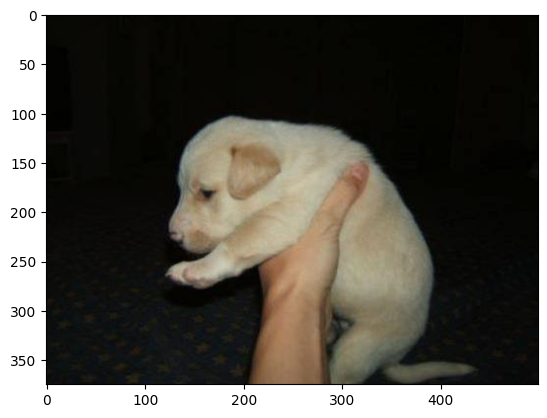

In [14]:
# display the dog image
img = mpimg.imread('/content/train/dog.5938.jpg')
imgplt = plt.imshow(img)
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

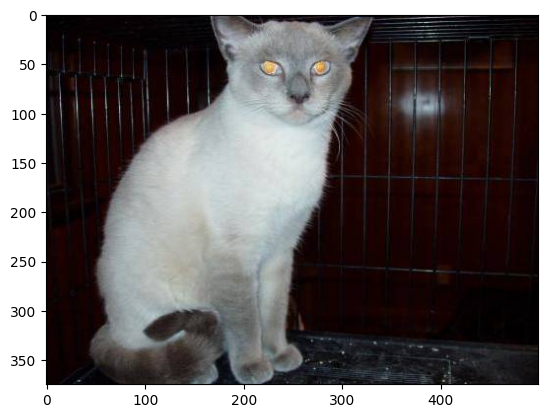

In [16]:
# display the cat image
img = mpimg.imread('/content/train/cat.9952.jpg')
imgplt = plt.imshow(img)
plt.imshow

while training of a neural network all the images should be of similar size
so we will resize the images for its processing

In [18]:
# segregating the cat and dog images

file_names = os.listdir('/content/train')

for i in range(5):
  name = file_names[i]
  print(name)


dog.9360.jpg
dog.5938.jpg
cat.9952.jpg
dog.6650.jpg
cat.10357.jpg


In [23]:
file_name = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_name:
  name = img_file[0:3]
  if name == 'dog':
    dog_count+=1
  else:
    cat_count+=1

print("Number of dog images", dog_count)
print("Number of cat images", cat_count)

Number of dog images 12500
Number of cat images 12500


In [28]:
#  resizing all the images

os.mkdir('/content/image resized')

In [29]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

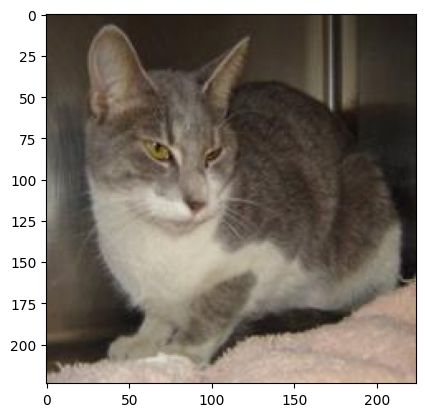

In [35]:
img = mpimg.imread('/content/image resized/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

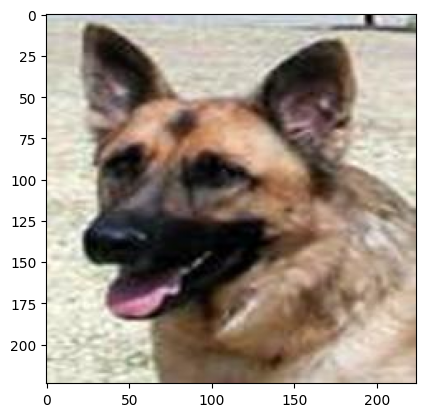

In [37]:
img = mpimg.imread('/content/image resized/dog.6650.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [40]:
#  creating a loop to assign label

filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [41]:
print(filenames[0:5])
print(len(labels))

['dog.9360.jpg', 'dog.5938.jpg', 'cat.9952.jpg', 'dog.6650.jpg', 'cat.10357.jpg']
2000


In [42]:
#  calculating the values of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1009  991]


In [50]:
# converting all the resized images to numpy arrays

import cv2
import glob
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [51]:
print(dog_cat_images)

[[[[101 112 132]
   [ 94 105 125]
   [ 84  95 115]
   ...
   [ 92  93 113]
   [ 92  90 110]
   [ 82  80 100]]

  [[ 90 101 121]
   [ 86  97 117]
   [ 81  92 112]
   ...
   [ 87  88 108]
   [ 88  87 107]
   [ 92  90 109]]

  [[ 79  91 109]
   [ 80  92 110]
   [ 80  92 110]
   ...
   [ 83  85 103]
   [ 85  85 103]
   [ 97  97 113]]

  ...

  [[182 174 181]
   [190 182 189]
   [198 191 198]
   ...
   [157 160 165]
   [160 163 168]
   [164 167 172]]

  [[192 184 191]
   [195 187 194]
   [196 189 196]
   ...
   [158 161 166]
   [161 164 169]
   [166 169 174]]

  [[203 195 202]
   [199 191 198]
   [191 184 191]
   ...
   [156 159 164]
   [160 163 168]
   [164 167 172]]]


 [[[  3   8   7]
   [  3   8   7]
   [  3   8   7]
   ...
   [  0   5   4]
   [  0   5   4]
   [  0   5   4]]

  [[  3   8   7]
   [  3   8   7]
   [  3   8   7]
   ...
   [  0   5   4]
   [  0   5   4]
   [  0   5   4]]

  [[  3   8   7]
   [  3   8   7]
   [  3   8   7]
   ...
   [  1   6   5]
   [  1   6   5]
   [  1   6

In [52]:
type(dog_cat_images)

numpy.ndarray

In [53]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [54]:
X = dog_cat_images
Y = np.asarray(labels)

Train_test_split

In [55]:
X_train,X_test,Y_train,_Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [56]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


we have 1600 training images and 400 testing images


In [57]:
#  scaling the data

X_train_scale = X_train/255
X_test_scale = X_test/255

In [58]:
print(X_train_scale)

[[[[0.31764706 0.10588235 0.00784314]
   [0.3254902  0.11372549 0.01568627]
   [0.34117647 0.11764706 0.01568627]
   ...
   [0.08627451 0.19607843 0.11764706]
   [0.07058824 0.18431373 0.09411765]
   [0.03529412 0.14901961 0.05882353]]

  [[0.34901961 0.1372549  0.03921569]
   [0.35686275 0.1372549  0.03921569]
   [0.35686275 0.13333333 0.03137255]
   ...
   [0.10196078 0.21568627 0.1254902 ]
   [0.08627451 0.2        0.10980392]
   [0.05882353 0.17254902 0.08235294]]

  [[0.38823529 0.17647059 0.08627451]
   [0.38823529 0.16862745 0.07058824]
   [0.37647059 0.15294118 0.05098039]
   ...
   [0.11372549 0.22745098 0.1372549 ]
   [0.10196078 0.21568627 0.1254902 ]
   [0.08235294 0.2        0.10196078]]

  ...

  [[0.0745098  0.06666667 0.09019608]
   [0.09803922 0.09411765 0.10980392]
   [0.12941176 0.1372549  0.1372549 ]
   ...
   [0.2627451  0.24313725 0.3254902 ]
   [0.27843137 0.25882353 0.34117647]
   [0.28627451 0.26666667 0.34901961]]

  [[0.08235294 0.07058824 0.10588235]
   [0.1

In [59]:
#  building the neural network

import tensorflow as tf
import tensorflow_hub as hub


In [62]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable = False)

In [63]:
num_of_classes = 2

model = tf.keras.Sequential([ pretrained_model,tf.keras.layers.Dense(num_of_classes)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [64]:
model.compile( optimizer = 'Adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics = ['acc'])

In [68]:
model.fit(X_train_scale,Y_train, epochs=10)

Epoch 1/10
50/50 [==============================] - 73s 1s/step - loss: 0.1528 - acc: 0.9475
Epoch 2/10
50/50 [==============================] - 77s 2s/step - loss: 0.0649 - acc: 0.9819
Epoch 3/10
50/50 [==============================] - 68s 1s/step - loss: 0.0501 - acc: 0.9875
Epoch 4/10
50/50 [==============================] - 70s 1s/step - loss: 0.0398 - acc: 0.9900
Epoch 5/10
50/50 [==============================] - 81s 2s/step - loss: 0.0350 - acc: 0.9925
Epoch 6/10
50/50 [==============================] - 73s 1s/step - loss: 0.0274 - acc: 0.9956
Epoch 7/10
50/50 [==============================] - 80s 2s/step - loss: 0.0229 - acc: 0.9962
Epoch 8/10
50/50 [==============================] - 71s 1s/step - loss: 0.0204 - acc: 0.9962
Epoch 9/10
50/50 [==============================] - 71s 1s/step - loss: 0.0173 - acc: 0.9975
Epoch 10/10
50/50 [==============================] - 69s 1s/step - loss: 0.0162 - acc: 0.9981


In [70]:
score, acc = model.evaluate(X_test_scale,_Y_test)
print('Test Loss=',score)
print('Test Accuracy=', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0658 - acc: 0.9775
Test Loss= 0.06578525900840759
Test Accuracy= 0.9775000214576721


path of image to be predicted:/content/download.jpg


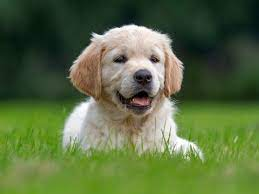

1/1 [==============================] - 0s 53ms/step
[[-5.2904058  5.4153643]]
1
The Image Represents a Dog


In [75]:
#  making a predictive system

input_image_path = input('path of image to be predicted:')
input_image  = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/225
input_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
input_prediction = model.predict(input_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label ==0:
  print('The Image Represents a Cat')

else:
  print('The Image Represents a Dog')

path of image to be predicted:/content/download (1).jpg


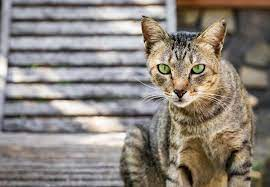

1/1 [==============================] - 0s 58ms/step
[[ 3.747952  -2.2603614]]
0
The Image Represents a Cat


In [76]:
input_image_path = input('path of image to be predicted:')
input_image  = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/225
input_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
input_prediction = model.predict(input_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label ==0:
  print('The Image Represents a Cat')

else:
  print('The Image Represents a Dog')